# Ensemble Methods

**Write and execute R code in the code cells per the instructions.  The expected results are provided for you directly following the code cells.**

In [1]:
f = "setup.R"; for (i in 1:10) { if (file.exists(f)) break else f = paste0("../", f) }; source(f)

.................................................... start of document ....................................................

## Data

x1,x2
3,5


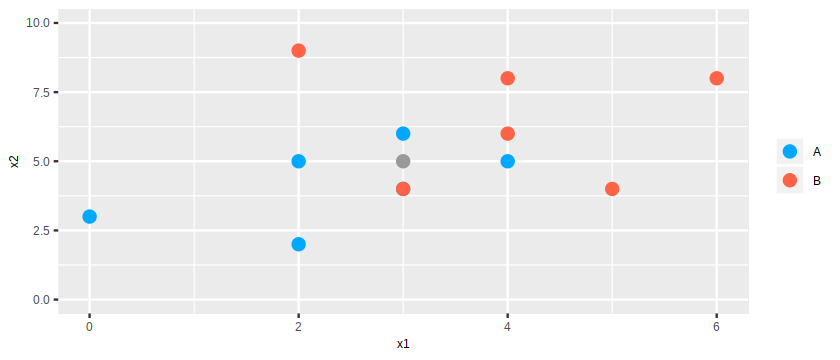

In [2]:
data = data.frame(x1=c(0,2,3,4,3,2,4,2,3,4,5,6), x2=c(3,2,6,5,4,5,8,9,4,6,4,8),
                  class=c("A","A","A","A","A","A","B","B","B","B","B","B"))
new = data.frame(x1=3, x2=5)
new

ggplot(data) + ylim(0,10) +
geom_point(aes(x=x1, y=x2, color=class)) +
geom_point(aes(x=x1, y=x2), data=new, color=NEW_COLOR)

## Problem 1

See below three bootstrap samples from the dataset.  Use bootstrap aggregating (bagging) on the naive Bayes method with these three samples to build models and predict the new observation's class, assuming cutoff for A is 0.5.  Also, show the probabilities calculated by each of the models for the new observation.  Also, show the predictions made by each of the models for the new observation.

You may want to use these function(s):
* naivebayes()
* predict()
* as.class()
* vote()

In [3]:
set.seed(12345)
data.1 = sample_n(data, nrow(data), replace=TRUE)
data.2 = sample_n(data, nrow(data), replace=TRUE)
data.3 = sample_n(data, nrow(data), replace=TRUE)

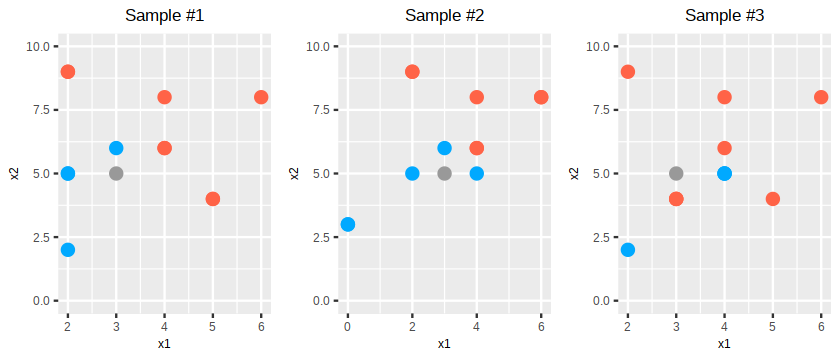

In [4]:
grid.arrange(ggplot(data.1) + ggtitle("Sample #1") + ylim(0,10) +
             geom_point(aes(x=x1, y=x2, color=class)) +
             geom_point(aes(x=x1, y=x2), data=new, color=NEW_COLOR) +
             theme.no_legend,
             
             ggplot(data.2) + ggtitle("Sample #2") + ylim(0,10) +
             geom_point(aes(x=x1, y=x2, color=class)) +
             geom_point(aes(x=x1, y=x2), data=new, color=NEW_COLOR) +
             theme.no_legend,
             
             ggplot(data.3) + ggtitle("Sample #3") + ylim(0,10) +
             geom_point(aes(x=x1, y=x2, color=class)) +
             geom_point(aes(x=x1, y=x2), data=new, color=NEW_COLOR) +
             theme.no_legend,
            
             nrow=1)

In [5]:
# Use bootstrap aggregating (bagging) on the naive Bayes method with these three samples to build models 
# and predict the new observation's class, assuming cutoff for A is 0.5
model.1 = naiveBayes(class ~ ., data.1)
model.2 = naiveBayes(class ~ ., data.2)
model.3 = naiveBayes(class ~ ., data.3)

In [6]:
# Show the probabilities calculated by each of the models for the new observation
prob.1 = predict(model.1, new, type="raw")
prob.1

prob.2 = predict(model.2, new, type="raw")
prob.2

prob.3 = predict(model.3, new, type="raw")
prob.3

A,B
0.4907981,0.5092019


A,B
0.8469818,0.1530182


A,B
0.4814371,0.5185629


In [7]:
# Show the predictions made by each of the models for the new observation
cutoff = 0.5
class.predicted.1 = as.class(prob.1, "A", cutoff)
class.predicted.2 = as.class(prob.2, "A", cutoff)
class.predicted.3 = as.class(prob.3, "A", cutoff)

class.predictions.df = data.frame(class.predicted.1, class.predicted.2, class.predicted.3)
class.predictions.df

class.predicted.1,class.predicted.2,class.predicted.3
B,A,B


In [8]:
# Show the final class prediction
class.predicted = vote(class.predicted.1, class.predicted.2, class.predicted.3)
data.frame(class.predicted)

class.predicted
B


## Problem 2

Use two levels of boosting on the support vector machine method to build models and predict the new observation's class, assuming cutoff for A is 0.5.  Also, show the insample performance of the 1st and 2nd models (each as a dataframe with a column for hits).  Also, show the training data for the 2nd and 3rd models (each as a dataframe).  Also, show the probabilities calculated by each of the models for the new observation.  Also, show the predictions made by each of the models for the new observation.

You may want to use these function(s):
* set.seed()
* svm()
* attr()
* predict()
* as.class()
* focus_data()
* vote()

Use `svm(..., ..., type="C-classification", kernel="polynomial", degree=2, cost=100, scale=TRUE, probability=TRUE)` to construct the models - precede it (each time you use it) with `set.seed(12345)`.<br>
Use `focus_data(..., ..., emphasis=10)` to determine training data for the 2nd and 3rd models - precede it (each time you use it) with `set.seed(12345)`.

In [9]:
# Build model 1
set.seed(12345)
model.1 = svm(class ~ ., data, type="C-classification", kernel="polynomial", degree=2, cost=100, scale=TRUE,
              probability=TRUE)

In [10]:
# Show the insample performance of the 1st model as a dataframe with a column for hits
prob.1 = attr(predict(model.1, data, probability=TRUE), "probabilities")
class.predicted.1 = as.class(prob.1, "A", cutoff)
hit.1 = class.predicted.1 == data$class

result.1 = data.frame(data, class.predicted.1, hit.1)
result.1

x1,x2,class,class.predicted.1,hit.1
0,3,A,B,FALSE
2,2,A,B,FALSE
3,6,A,B,FALSE
4,5,A,B,FALSE
3,4,A,B,FALSE
2,5,A,B,FALSE
4,8,B,B,TRUE
2,9,B,A,FALSE
3,4,B,B,TRUE
4,6,B,B,TRUE


In [11]:
# Show the training data for the 2nd model as a dataframe
set.seed(12345)
data.2 = focus_data(data, hit.1, emphasis=10)
data.2

,x1,x2,class
8,2,9,B
4,4,5,A
8.1,2,9,B
4.1,4,5,A
1,0,3,A
5,3,4,A
2,2,2,A
3,3,6,A
8.2,2,9,B
9,3,4,B


In [12]:
# Build model 2
set.seed(12345)
model.2 = svm(class ~ ., data.2, type="C-classification", kernel="polynomial", degree=2, cost=100, scale=TRUE,
              probability=TRUE)

In [13]:
# Show the insample performance of the 2st model as a dataframe with a column for hits
prob.2 = attr(predict(model.2, data.2, probability=TRUE), "probabilities")
class.predicted.2 = as.class(prob.2, "A", cutoff)
hit.2 = class.predicted.2 == data.2$class

result.2 = data.frame(data.2, class.predicted.2, hit.2)
result.2

,x1,x2,class,class.predicted.2,hit.2
8,2,9,B,B,TRUE
4,4,5,A,A,TRUE
8.1,2,9,B,B,TRUE
4.1,4,5,A,A,TRUE
1,0,3,A,A,TRUE
5,3,4,A,A,TRUE
2,2,2,A,A,TRUE
3,3,6,A,A,TRUE
8.2,2,9,B,B,TRUE
9,3,4,B,A,FALSE


In [14]:
# Show the training data for the 3nd model as a dataframe
set.seed(12345)
data.3 = focus_data(data.2, hit.2, emphasis=10)
data.3

,x1,x2,class
4.1,4,5,A
6,2,5,A
4.1.1,4,5,A
6.1,2,5,A
9,3,4,B
9.1,3,4,B
9.2,3,4,B
8.1,2,9,B
4.1.2,4,5,A
8,2,9,B


In [15]:
# Build model 3
set.seed(12345)
model.3 = svm(class ~ ., data.3, type="C-classification", kernel="polynomial", degree=2, cost=100, scale=TRUE,
              probability=TRUE)

In [16]:
# Show the probabilities calculated by each of the models for the new observation
# Show the prediction of class by each of the models for the new observation
prob.1 = attr(predict(model.1, new, probability=TRUE), "probabilities")
prob.1
class.predicted.1 = as.class(prob.1, "A", cutoff)
class.predicted.1

prob.2 = attr(predict(model.2, new, probability=TRUE), "probabilities")
prob.2
class.predicted.2 = as.class(prob.2, "A", cutoff)
class.predicted.2

prob.3 = attr(predict(model.3, new, probability=TRUE), "probabilities")
prob.3
class.predicted.3 = as.class(prob.3, "A", cutoff)
class.predicted.3

A,B
0.3846293,0.6153707


[1] B
Levels: A B

B,A
0.1608187,0.8391813


[1] A
Levels: B A

A,B
0.2058604,0.7941396


[1] B
Levels: A B

In [17]:
data.frame(class.predicted.1, class.predicted.2, class.predicted.3)

class.predicted.1,class.predicted.2,class.predicted.3
B,A,B


In [18]:
# Show the final prediction
class.predicted = vote(class.predicted.1, class.predicted.2, class.predicted.3)
data.frame(class.predicted)

class.predicted
B


## Problem 3

Use stacking on the naive Bayes method over three support vector machine methods to build a model and predict the new observation's class, assuming cutoff for A is 0.5.

Hyper-parameters for the support vector machine methods:
* For Model #1: _type="C-classification", kernel="polynomial", degree=2, cost=1, scale=TRUE, probability=TRUE_
* For Model #2: _type="C-classification", kernel="polynomial", degree=3, cost=100, scale=TRUE, probability=TRUE_
* For Model #3: _type="C-classification", kernel="radial", gamma=1, cost=100, scale=TRUE, probability=TRUE_

Show the dataset and new observation expressed in terms of the new variables.  Show the probabilities calculated by the naive Bayes model for the new observation.

You may want to use these function(s):
* set.seed()
* svm()
* attr()
* predict()
* as.class()
* naiveBayes()

Use `svm(...)` to construct the support vector machine models - precede it (each time you use it) with `set.seed(12345)`.

Construct a new dataset.  Each observation in the new dataset corresponds to an observation in the original dataset.  The variables are predictions from the 3 models and the actual class.

In [19]:
# Build model 1
set.seed(12345)
model.1 = svm(class ~ ., data, type="C-classification", kernel="polynomial", degree=2, cost=1, scale=TRUE, 
              probability=TRUE)

# Build model 2
set.seed(12345)
model.2 = svm(class ~ ., data, type="C-classification", kernel="polynomial", degree=3, cost=100, scale=TRUE, 
              probability=TRUE)

# Build model 3
set.seed(12345)
model.3 = svm(class ~ ., data, type="C-classification", kernel="radial", gamma=1, cost=100, scale=TRUE, 
              probability=TRUE)

In [20]:
# Calculate the probabilities and predict the class of the original training data
prob.1 = attr(predict(model.1, data, probability=TRUE), "probabilities")
class.predicted.1 = as.class(prob.1, "A", cutoff)

prob.2 = attr(predict(model.2, data, probability=TRUE), "probabilities")
class.predicted.2 = as.class(prob.2, "A", cutoff)

prob.3 = attr(predict(model.3, data, probability=TRUE), "probabilities")
class.predicted.3 = as.class(prob.3, "A", cutoff)

In [21]:
class = data$class
data.stack = data.frame(data[, c("x1", "x2")], class.predicted.1, class.predicted.2, class.predicted.3, class)
data.stack

x1,x2,class.predicted.1,class.predicted.2,class.predicted.3,class
0,3,B,A,B,A
2,2,B,A,B,A
3,6,B,B,B,A
4,5,B,B,B,A
3,4,B,B,B,A
2,5,B,B,B,A
4,8,B,B,A,B
2,9,A,B,A,B
3,4,B,B,B,B
4,6,B,B,A,B


In [22]:
# Calculate the probabilities and predict the class of the new data
prob.1 = attr(predict(model.1, new, probability=TRUE), "probabilities")
class.predicted.1 = as.class(prob.1, "A", cutoff)

prob.2 = attr(predict(model.2, new, probability=TRUE), "probabilities")
class.predicted.2 = as.class(prob.2, "A", cutoff)

prob.3 = attr(predict(model.3, new, probability=TRUE), "probabilities")
class.predicted.3 = as.class(prob.3, "A", cutoff)

In [23]:
new.stack = data.frame(new, class.predicted.1, class.predicted.2, class.predicted.3)
new.stack

x1,x2,class.predicted.1,class.predicted.2,class.predicted.3
3,5,B,B,B


In [24]:
# Show the probabilities calculated by the naive Bayes model for the new observation.
model.stack = naiveBayes(class ~ class.predicted.1+class.predicted.2+class.predicted.3, data.stack)
stack.prob = predict(model.stack, new.stack, type="raw")
stack.prob

A,B
0.8275862,0.1724138


In [25]:
class.predicted = as.class(stack.prob, "A", cutoff)
data.frame(class.predicted)

class.predicted
A


<font size=1;>
<p style="text-align: left;">
Copyright (c) Berkeley Data Analytics Group, LLC
<span style="float: right;">
Document revised April 20, 2020
</span>
</p>
</font>